# Mencari Peluang untuk Pengembangan Usaha Berbasis Waralaba maupun Nonwaralaba

Kamu telah memutuskan untuk membuka sebuah kafe kecil di Los Angeles. Kafe milikmu bisa dibilang cukup unik karena kamu "memperkerjakan" robot sebagai pelayan atau pramusaji. Proyek ini memang menjanjikan, tetapi membutuhkan modal yang besar. Oleh karena itu, kamu dan para mitra memutuskan untuk menarik minat investor agar mau berinvestasi. Mereka tertarik dengan kondisi pasar saat ini—tetapi, apakah kamu bisa mempertahankan kesuksesan saat daya tarik sang robot mulai pudar?

Mengingat kamu adalah seorang pakar analisis, para mitra pun memintamu untuk mempersiapkan sejumlah riset pasar. Kamu memiliki data open-source terkait jenis-jenis usaha tempat makan di LA.

Tujuan : Mencari peluang bisnis berdasarkan rekomendasi tentang jenis usaha, jumlah kursi, dan lokasi usahanya.

## Deskripsi Data

Dataframe `visits_us` memuat:
   - `id` — ID pelanggan
   - `object_name` — Nama usaha
   - `chain` —  Usaha berbasis waralaba (TRUE/FALSE)
   - `object_type` — Jenis usaha
   - `addres` —  Alamat
   - `number` —  Jumlah kursi

## Inisialisasi Data

import libraries

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Memuat data

In [74]:
try:
    rest_data = pd.read_csv('rest_data_us.csv')
except:
    rest_data = pd.read_csv('/datasets/rest_data_us.csv')

## Mengenal dan Memperbaiki Data

Mlihat dan mencari data abnormal

In [75]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [76]:
rest_data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


Tidak terlihat adanya nilai duplikasi

In [77]:
rest_data.duplicated().sum()

0

Ditemukannya nilai missing pada kolom "chain" sejumlah 3 nilai

In [78]:
report_null = rest_data.isnull().sum().to_frame()
report_null = report_null.rename(columns={0:'missing_values'})
report_null['% of total'] = (report_null['missing_values'] / rest_data.shape[0]).round(2)
report_null.sort_values(by='missing_values', ascending=False)

,missing_values,% of total
chain,3,0.0
id,0,0.0
object_name,0,0.0
address,0,0.0
object_type,0,0.0
number,0,0.0


Kita eliminasi nilai tersebut dengan dropna

In [79]:
rest_data = rest_data.dropna()

Kita ubah tipe data pada kolom "chain" dengan boolean

In [80]:
rest_data['chain'] = rest_data['chain'].astype('bool')

## Analisis Data

### Mempelajari Data

KIta akan mencari jumlah usaha pada tiap-tiap jenis usahannya

In [81]:
chain_type = rest_data.groupby(['object_type']).agg({'id': 'count'}).reset_index()
chain_type.columns = ['object_type', 'count']
chain_type

,object_type,count
0,Bakery,283
1,Bar,292
2,Cafe,435
3,Fast Food,1066
4,Pizza,319
5,Restaurant,7253


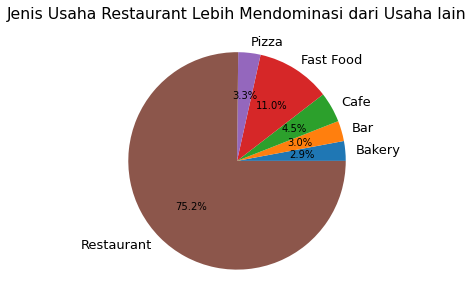

In [82]:
plt.figure(figsize=(10, 5))
plt.title('Jenis Usaha Restaurant Lebih Mendominasi dari Usaha lain')
plt.pie(chain_type['count'], labels=chain_type['object_type'], autopct='%.1f%%')
plt.show()

Proporsi Jenis Usaha:
1. Restaurant yang memiliki nilai paling tinggi dengan 75%, lalu diikuti dengan Fast food (11%).
2. Bakery yang memiliki nilai paling rendah dengan 2,9% saja
3. Tempat makan jauh lebih banyak daripada toko roti, apakah orang US tidak suka ke toko roti? mungkin lebih kepada habitnya orang untuk makan sehari-hari cenderung ke restaurant daripada bakery.

Mencari tahu setiap waralaba dan nonwaralaba untuk setiap jenis usaha yang ada

In [83]:
count_type = rest_data.groupby(['object_type', 'chain']).agg({'id': 'count'}).reset_index()
count_type.columns = ['object_type', 'chain', 'count']
count_type.sort_values(by='count', ascending=False)

,object_type,chain,count
9,Restaurant,False,4961
10,Restaurant,True,2292
6,Fast Food,True,605
5,Fast Food,False,461
0,Bakery,True,283
4,Cafe,True,266
1,Bar,False,215
3,Cafe,False,169
7,Pizza,False,166
8,Pizza,True,153


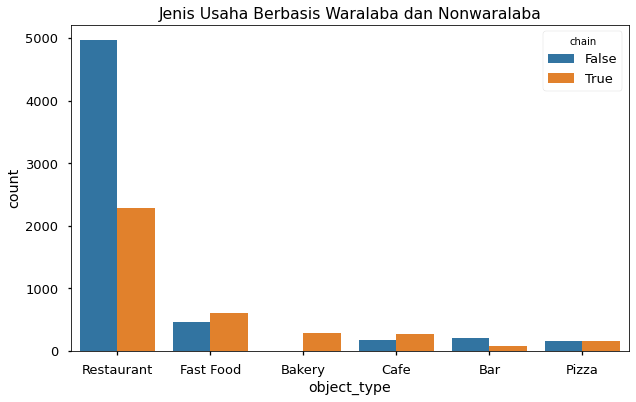

In [84]:
plt.figure(figsize=(10, 6))
plt.title('Jenis Usaha Berbasis Waralaba dan Nonwaralaba')
sns.barplot(data=count_type.sort_values(by='count', ascending=False), x='object_type', y='count', hue='chain')
plt.show()

Proporsi Jenis Usaha:
1. Restaurant yang memiliki jumlah usaha waralaba paling banyak dengan 2292, dan nonwaralaba 4961  outlet.
2. Bar yang memiliki jumlah usaha waralaba paling rendah dengan 77, dan Pizza untuk nonwaralaba 166.
3. Kita dapat melihat untuk bakery tidak memiliki usaha nonwaralaba, sepertinya jenis usaha seperti ini memang lebih cocok untuk usaha nonwaralaba.

Melihat proporsi usaha waralaba dan nonwaralaba 

In [85]:
rest_chain = rest_data.groupby('chain')['id'].count().reset_index()
rest_chain

,chain,id
0,False,5972
1,True,3676


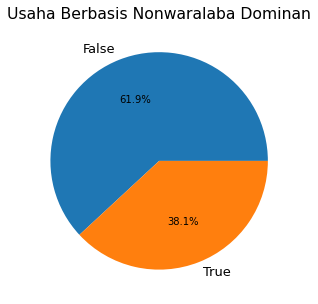

In [86]:
plt.figure(figsize=(10, 5))
plt.title('Usaha Berbasis Nonwaralaba Dominan')
plt.pie(rest_chain['id'], labels=rest_chain['chain'], autopct='%.1f%%')
plt.show()

Proporsi usaha:
1. Usaha Non-waralaba jauh lebih dominan dengan presentase 61,9% di US
2. Sedangkan untuk Usaha Waralaba memiliki presentase 38,1%
3. Apakah usaha-usaha ini terdapat di satu titik wilayah kota atau terbagi di beberapa wilayah?

Mencari rasio jenis usaha berbasis waralaba maupun nonwaralaba

In [87]:
chain = pd.pivot_table(rest_data, values ='id', index = 'object_type',
                                columns = 'chain', aggfunc='count', margins=True)
chain = chain[:6].fillna(0).reset_index()
chain['ratio'] = round(chain[True] / chain['All'] * 100, 2)
chain

chain,object_type,False,True,All,ratio
0,Bakery,0.0,283.0,283,100.00
1,Bar,215.0,77.0,292,26.37
2,Cafe,169.0,266.0,435,61.15
3,Fast Food,461.0,605.0,1066,56.75
4,Pizza,166.0,153.0,319,47.96
5,Restaurant,4961.0,2292.0,7253,31.60


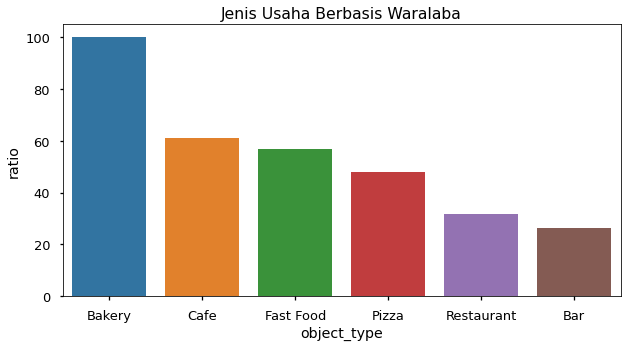

In [88]:
plt.figure(figsize=(10, 5))
plt.title('Jenis Usaha Berbasis Waralaba')
sns.barplot(data=chain.sort_values(by='ratio', ascending=False), x='object_type', y='ratio')
plt.show()

Jenis usaha basis waralaba:
1. Bakery merupakan usaha yang memang berbasis waralaba dengan rasio 100%.
2. Sedangkan jenis usaha Bar memiliki jumlah rasio 26% waralaba saja.
3. Berdasarkan hasil rasio waralaba kita jadi tahu restaurant yang sebelumnya memimpin untuk jumlah usaha terbanyak ternyata tidak lebih tinggi dari bakery.

Melihat persebaran jumlah kursi dengan tempatnya berdasarkan usaha waralaba

In [89]:
waralaba = rest_data[rest_data['chain']==True]

In [90]:
waralaba['object_name'].value_counts().head()

THE COFFEE BEAN & TEA LEAF    47
SUBWAY                        31
DOMINO'S PIZZA                15
WABA GRILL                    14
KENTUCKY FRIED CHICKEN        14
Name: object_name, dtype: int64

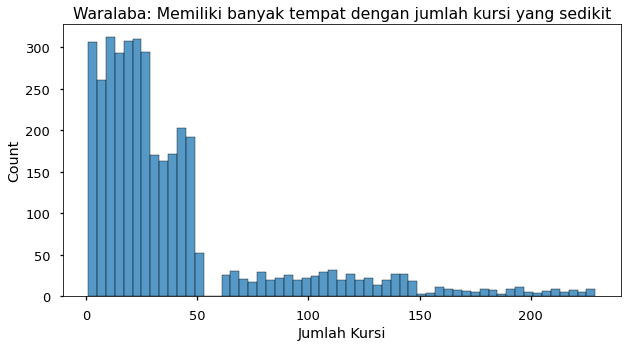

In [91]:
plt.figure(figsize=(10, 5))
plt.title('Waralaba: Memiliki banyak tempat dengan jumlah kursi yang sedikit')
plt.xlabel('Jumlah Kursi')
sns.histplot(data=waralaba['number'])
plt.show()

Ciri-ciri pada usaha berbasis waralaba:
1. Jumlah tempatnya banyak dengan sedikit kursi.
2. Persebaran data paling banyak pada angka 0 - 50, menandakan tipikal usaha waralaba lebih banyak tempat usahanya pada jumlah kursi yang sedikit, daripada jumlah waralaba sedikit dengan jumlah kursi yang banyak

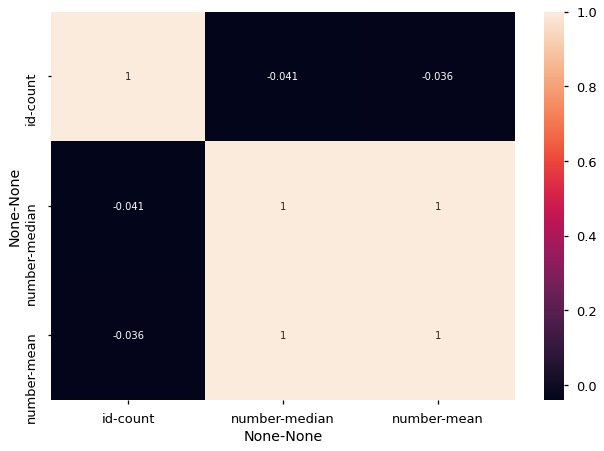

In [92]:
correlation = waralaba.groupby('object_name').agg({'id':'count', 'number':['median','mean']}).corr()
sns.heatmap(correlation, annot=True)
plt.show()

Korelasi jumlah tempat usaha dengan jumlah kursi pada usaha berbasis waralaba:
1. Berdasarkan jumlah rata-ratanya nilai korelasinya cukup rendah di 0.036
2. Berdasarkan jumlah median nilai korelasinya juga cukup rendah di 0.041

Mencari jumlah rata-rata kursi untuk setiap jenis usahanya

In [93]:
avg_number = rest_data.groupby('object_type').agg({'number': ['mean', 'median']}).reset_index().sort_values(by=('number', 'mean'), ascending=False)
avg_number.columns = ['object_type', 'mean', 'median']
avg_number

,object_type,mean,median
5,Restaurant,48.048807,29.0
1,Bar,44.767123,28.5
3,Fast Food,31.837711,21.0
4,Pizza,28.545455,19.0
2,Cafe,25.000000,21.0
0,Bakery,21.773852,18.0


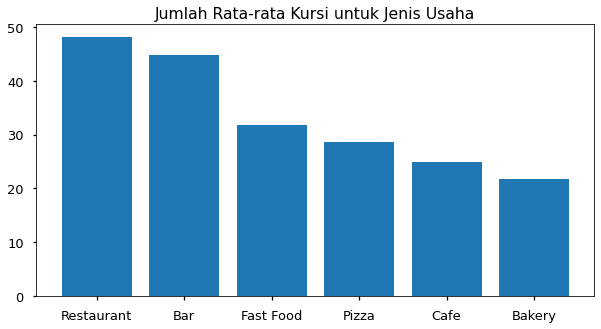

In [94]:
plt.figure(figsize=(10, 5))
plt.title('Jumlah Rata-rata Kursi untuk Jenis Usaha')
plt.bar(avg_number['object_type'], avg_number['mean'])
plt.style.use('seaborn-talk')
plt.show()

Jumlah Rata-rata Kursi untuk Jenis Usaha:
1. Pemilik kursi terbanyak ada Restaurant dengan jumlah 48 kursi
2. Nilainya tidak terpaut jauh dari yang lain, akan tetapi persebarannya belum diketahui

### Menentukan Parameter

Mencari tahu jumlah usaha berdasarkan alamat usaha (address) serta mendapatkan 10 usaha teratasnya

Disini kita iris hanya nama jalannya saja

In [95]:
df_address = rest_data['address'].apply(lambda x: ' '.join(x.split(' ')[1:])).to_frame()
df_address = df_address['address'].apply(lambda x: ''.join(x.split(' # ')[0])).to_frame()
df_address = df_address['address'].apply(lambda x: ''.join(x.split('#')[0])).to_frame()
df_address['count'] = 1

In [96]:
top10_address = df_address.groupby('address').count().sort_values(by='count', ascending = False)[0:10].reset_index()
top10_address

,address,count
0,W SUNSET BLVD,296
1,W PICO BLVD,288
2,HOLLYWOOD BLVD,167
3,WILSHIRE BLVD,161
4,S VERMONT AVE,148
5,SANTA MONICA BLVD,146
6,W 3RD ST,145
7,BEVERLY BLVD,135
8,S FIGUEROA ST,134
9,S WESTERN AVE,128


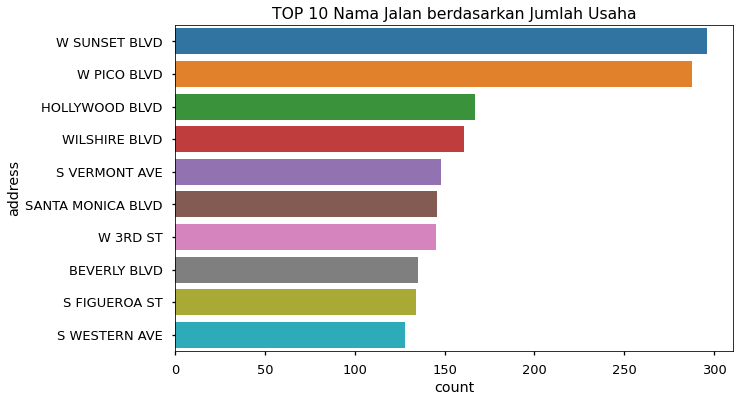

In [97]:
plt.figure(figsize=(10, 6))
plt.title('TOP 10 Nama Jalan berdasarkan Jumlah Usaha')
bar = sns.barplot(data=top10_address, x='count', y='address')
plt.show()

10 Nama Jalan Teratas berdasarkan Jumlah Usaha:
1. Peringkat pertama ada nama jalan "W SUNSET BLVD" dengan jumlah total outlet 296, lalu ada "W SUNSET BLVD" (288).
2. Di peringkat 10 ada "S WESTERN AVE" dengan total 128 outlet.
3. Baik nama jalan "W SUNSET BLVD" dan "W SUNSET BLVD" memiliki jumlah outlet yang terpaut jauh dengan yang lain, ini mengindikasikan lokasi tersebut besar kemungkinan daerah kota yang padat penduduk.

Mencari nama jalan yang hanya memiliki 1 usaha di setiap lokasinya

In [98]:
min_address = df_address.groupby('address').min().sort_values(by='count', ascending = False)[0:10].reset_index()
min_address

,address,count
0,1/2 3RD ST,1
1,SANTA ROSALIA DR F,1
2,SANTA MONICA BLVD STE D,1
3,SANTA MONICA BLVD STE FC3,1
4,SANTA MONICA BLVD STE FC4,1
5,SANTA MONICA BLVD STE FC5,1
6,SANTA MONICA BLVD STE S156,1
7,SANTA MONICA BLVD STE STE A,1
8,SANTA MONICA BLVD UNIT UNIT,1
9,SANTA ROSALIA DR,1


Sebetulnya masih ada banyak lagi, akan tetapi ini 10 lokasi sample yang bisa kita ambil

Mencari Jumlah Kursi untuk TOP 10 nama Jalan 

In [99]:
rest_data['address_clean'] = df_address['address']

In [100]:
top10_add_num = rest_data.groupby(['address_clean']).agg({'id': 'count', 'number': 'sum'}).sort_values(by='id', ascending = False)[0:10].reset_index()
top10_add_num.columns = ['address', 'count', 'number']

In [101]:
fig = px.bar(top10_add_num, x='address', y='number', title='Jumlah Kursi untuk TOP 10 Nama Jalan')
fig.update_xaxes(tickangle=45)
fig.show()

Jumlah Kursi untuk TOP 10 Nama Jalan:
1. Seperti halnya jumlah outlet yang ada, ternyata nama jalan "W SUNSET BLVD" dan "W PICO BLVD" juga memiliki jumlah kursi paling banyak
2. Akan tetapi untuk nilai yang paling sedikit yaitu nama jalan "SANTA MONICA BLVD", walaupun sebenarnya outletnya cukup banyak untuk peringkat ke-6
3. Pada grafik bisa kita lihat rata-rata jumlah kursi di kisaran 6000 - 8000 dengan perbandingan yang tidak terlalu signifikan

Sekarang kita akan lihat persebarannya untuk jumlah kursi yang dimiliki oleh nama jalan teratas (W SUNSET BLVD)

In [102]:
top1 = rest_data.loc[rest_data['address_clean']=='W SUNSET BLVD']

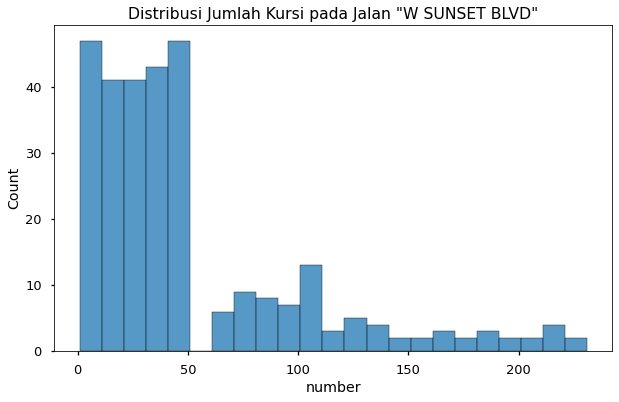

In [103]:
plt.figure(figsize=(10, 6))
plt.title('Distribusi Jumlah Kursi pada Jalan "W SUNSET BLVD"')
sns.histplot(data=top1['number'], binwidth=10)
plt.show()

Distribusi Jumlah Kursi pada Jalan "W SUNSET BLVD":
1. Di beberapa titik lokasi jumlah kursi yang dimiliki "W SUNSET BLVD" paling banyak di 1 - 50 kursi dengan jumlah 40 ke atas.
2. Sedangkan untuk jumlah kursi 60 - 200 ke atas lebih condong stabil di angka 1 - 10 kursi.
3. Sepertinya di daerah ini memiliki banyak usaha waralaba dengan melihat jumlah usahanya pada kursi ke 1 - 50.

## Kesimpulan Umum

Diawali dengan import library pandas, seaborn, matplotlib, dan plotly. Lalu memperbaiki tipe datanya untuk kolom chain, dan mengeliminasi nilai missing yang berjumlahkan 3 dengan dropna. data pun siap di analisis.

Mempelajari data:
- Proporsi Jenis Usaha:
    1. Restaurant yang memiliki nilai paling tinggi dengan 75%, lalu diikuti dengan Fast food (11%).
    2. Tempat makan jauh lebih banyak daripada toko roti, apakah orang US tidak suka ke toko roti? mungkin lebih kepada habitnya orang untuk makan sehari-hari cenderung ke restaurant daripada bakery.
- Proporsi usaha waralaba dan nonwaralaba:
    1. Usaha Non-waralaba jauh lebih dominan dengan presentase 61,9% di US.
- Jenis usaha basis waralaba:
    1. Bakery merupakan usaha yang memang berbasis waralaba dengan rasio 100%.
    2. Berdasarkan hasil rasio waralaba kita jadi tahu restaurant yang sebelumnya memimpin untuk jumlah usaha terbanyak ternyata tidak lebih tinggi dari bakery.
- Ciri-ciri pada usaha berbasis waralaba:
    1. Jumlah tempatnya banyak dengan jumlah kursi yang lebih sedikit.
    2. Persebaran data paling banyak pada angka 0 - 50, menandakan tipikal usaha waralaba lebih banyak tempat usahanya pada jumlah kursi yang sedikit, daripada jumlah waralaba sedikit dengan jumlah kursi yang banyak.
- Jumlah Rata-rata Kursi untuk Jenis Usaha:
    1. Pemilik kursi terbanyak ada Restaurant dengan jumlah 48 kursi.
    2. Nilainya tidak terpaut jauh dari yang lain.
    
Analisis data:
- 10 Nama Jalan Teratas berdasarkan Jumlah Usaha:
    1. Peringkat pertama ada nama jalan "W SUNSET BLVD" dengan jumlah total outlet 296, lalu ada "W SUNSET BLVD" (288).
    2. Baik nama jalan "W SUNSET BLVD" dan "W SUNSET BLVD" memiliki jumlah outlet yang terpaut jauh dengan yang lain, ini mengindikasikan lokasi tersebut besar kemungkinan daerah kota yang padat penduduk.
- Jumlah Kursi untuk TOP 10 Nama Jalan:
    1. Seperti halnya jumlah outlet yang ada, ternyata nama jalan "W SUNSET BLVD" dan "W PICO BLVD" juga memiliki jumlah kursi paling banyak.
    2. Akan tetapi untuk nilai yang paling sedikit yaitu nama jalan "SANTA MONICA BLVD", walaupun sebenarnya outletnya cukup banyak untuk peringkat ke-6.
    3. Pada grafik bisa kita lihat rata-rata jumlah kursi di kisaran 6000 - 8000 dengan perbandingan yang tidak terlalu signifikan.
- Distribusi Jumlah Kursi pada Jalan "W SUNSET BLVD":
    1. Di beberapa titik lokasi jumlah kursi yang dimiliki "W SUNSET BLVD" paling banyak di 1 - 50 kursi dengan jumlah 40 ke atas.
    2. Sedangkan untuk jumlah kursi 60 - 200 ke atas lebih condong stabil di angka 1 - 10 kursi.
    3. Sepertinya di daerah ini memiliki banyak usaha waralaba dengan melihat jumlah usahanya pada jumlah kursi ke 1 - 50.
    
Kesimpulan umum yang dapat ditarik adalah "W SUNSET BLVD" dan "W PICO BLVD" yang merupakan nama jalan dengan jumlah usahanya paling banyak baik dari basis waralaba maupun nonwaralaba yang mengindikasikan juga di daerah tersebut mayoritas penduduknya paling banyak sehingga peluang bisnis akan jauh lebih tinggi. Walaupun proporsi jenis usaha yang paling di gemari yaitu jenis usaha Restaurant, tidak menutup kemungkinan cafe juga dapat bersaing di daerah tersebut berdasarkan jumlah kursi yang dimiliki pada lokasi tersebut. Bisa kita asumsikan seseorang setelah makan pasti akan mencari minum, sehingga cafe adalah salah satu alternatif yang bisa kita tawarkan.